In [71]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Dense
from tensorflow import keras
import matplotlib.pyplot as plt

In [11]:
image_gen = image.ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest'
                              )

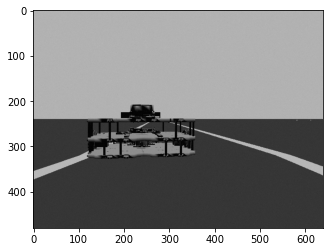

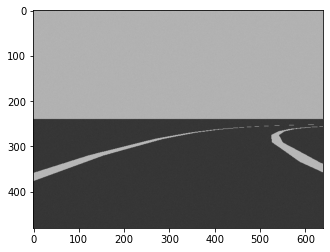

In [12]:
bot_image = cv2.imread('BOT_EMPTY/test/BOT/3.jpg')
empty_image = cv2.imread('BOT_EMPTY/test/EMPTY/3.jpg')
input_shape = bot_image.shape
plt.figure()
plt.imshow(bot_image)
plt.figure()
plt.imshow(empty_image)

In [20]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dropout(0.25))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 478, 638, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 239, 319, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 237, 317, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 118, 158, 64)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 116, 156, 128)     73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 58, 78, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 579072)           

In [22]:
train_image_gen = image_gen.flow_from_directory('BOT_EMPTY/train',
                                                   target_size=input_shape[:2],
                                                   batch_size=16,
                                                   class_mode='binary')
test_image_gen = image_gen.flow_from_directory('BOT_EMPTY/test',
                                                   target_size=input_shape[:2],
                                                   batch_size=16,
                                                   class_mode='binary')



Found 998 images belonging to 2 classes.
Found 298 images belonging to 2 classes.


In [23]:
train_image_gen.class_indices

{'BOT': 0, 'EMPTY': 1}

In [24]:
results = model.fit(train_image_gen,epochs=5,validation_data=test_image_gen)

Epoch 1/5
63/63 [==============================] - 360s 6s/step - loss: 2.0830 - accuracy: 0.5270 - val_loss: 0.4935 - val_accuracy: 0.9396
Epoch 2/5
63/63 [==============================] - 306s 5s/step - loss: 0.4363 - accuracy: 0.8582 - val_loss: 0.0347 - val_accuracy: 0.9899
Epoch 3/5
63/63 [==============================] - 303s 5s/step - loss: 0.2774 - accuracy: 0.9185 - val_loss: 0.0997 - val_accuracy: 0.9698
Epoch 4/5
63/63 [==============================] - 291s 5s/step - loss: 0.5474 - accuracy: 0.8310 - val_loss: 0.2198 - val_accuracy: 0.9128
Epoch 5/5
63/63 [==============================] - 290s 5s/step - loss: 0.2733 - accuracy: 0.8873 - val_loss: 0.1372 - val_accuracy: 0.9732


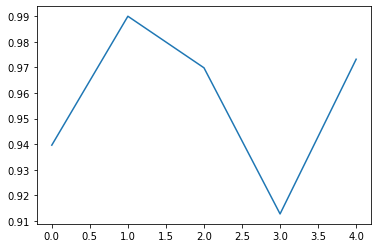

In [30]:
plt.plot(results.history['val_accuracy'])

In [80]:
bot_img = image.load_img('BOT_EMPTY/test/BOT/3.jpg')
bot_img = image.img_to_array(bot_img)/255
bot_img = np.expand_dims(bot_img,axis=0)
model.predict_classes(bot_img)

array([[0]])

In [68]:
model.save('TurtleBotClassifer.h5')